## Εργαστηριακή Άσκηση 3
### Προσαρμοσμένα φίλτρα και L-ASK

#### Σημείωση
Επειδή στο μέρος 1 έπρεπε κάθε φορά να πραγματοποιούμε διαφορετικές αλλαγές στην συνάρτηση ask_errors
που δινόταν στο Matlab, αναγκαστήκαμε να αντιγράψουμε και να τροποποιήσουμε τον κώδικά της 3 φορές.
Έτσι είχαμε την δυνατότητα να την καλούμε κάθε φορά με τις θεμιτές παραμέτρους και να λαμβάνουμε διαφορετικά
αποτελέσματα (τιμές, διαγράμματα...) με βάση το ζητούμενο του κάθε ερωτήματος.

In [2]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib.pyplot as plt
import numpy as np

### Μέρος 1
#### Ερώτημα α)

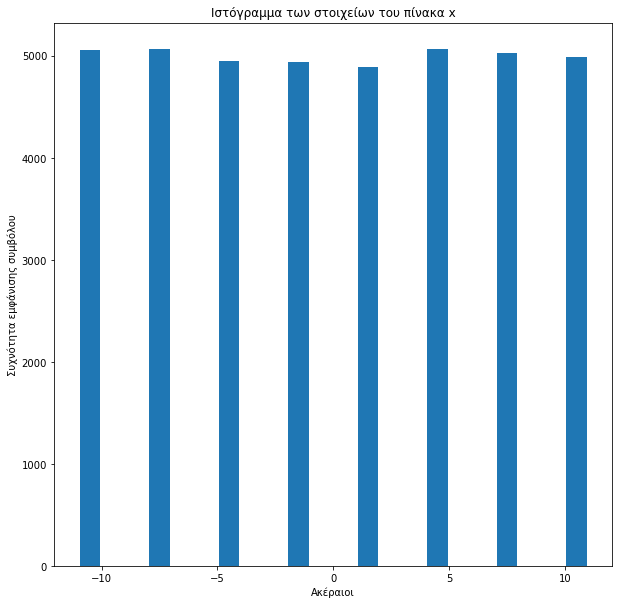

In [4]:
#ακολουθεί τροποποιημένη εκδοχή της συνάρτησης ask_erros, ώστε να υπολογίζει την
#θεωρητική και μετρούμενη ισχύ και να τυπώνει ένα ιστόγραμμα που να αποδυκνύει ότι
#τα στοιχεία του διανύσματος x ακολουθούν πράγματι την ομοιόμορφη κατανομή.

k = 3
Nsymb = 40000
L = 2**k
d = 3

# Διάνυσμα τυχαίων ακεραίων - διαφορετικών συμβόλων {±d/2, ±3d/2, ±5d/2... }
x = d*np.floor(L*np.random.rand(Nsymb)) - L*d/2 + d/2  

'''Px =(L**2-1)/3                                # θεωρητική ισχύς σήματος 
print("θεωρητική ισχύς σήματος =", Px)
P2x = np.sum(np.multiply(x, x))/np.size(x);    # μετρούμενη ισχύς σήματος (για επαλήθευση)
print("μετρούμενη ισχύς σήματος =", P2x)
'''

#ο πίνακας bins έχει την θέση των στάθμεων (σημεία στον άξονα χ)
#δηλαδή  d=3 ->[-10.5  -7.5  -4.5  -1.5   1.5   4.5   7.5  10.5]
bins = np.unique(x)
bins = np.append(bins, np.max(bins)+d)
#(στον πίνακα προσθέτουμε μια επιπλέον τιμή ίση με np.max(bins)+d, δηλαδή 13.5 αν d=3,
# καθώς η συνάρτηση hist αγνοεί την τελευταία τιμή του πίνακα, και δεν θέλουμε να αγνοήσουμε την 10.5)


plt.subplots(1,1, figsize=(10, 10))
# Δημιουργούμε το ιστόγραμμα δίνοντας τα όρια των στηλών 
plt.hist(x, bins, rwidth=0.3, align='left')
# Αλλάζουμε τον άξονα x, ώστε να εμφανίζει το μέσο κάθε bin
#ax.set_xticks(A)

plt.xlabel("Ακέραιοι")
plt.ylabel("Συχνότητα εμφάνισης συμβόλου")
plt.title("Ιστόγραμμα των στοιχείων του πίνακα x")
plt.show()

### Μέρος 1
#### Ερώτημα β) και γ)
φτιάχνουμε τα ιστογράμματα των συμβόλων για k = 3, M = 50000, nsamp=16, και για τιμές του σηματοθορυβικού λόγου Ebno 12, 14, 18 

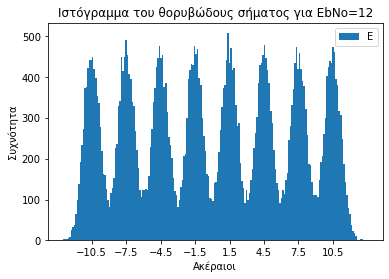

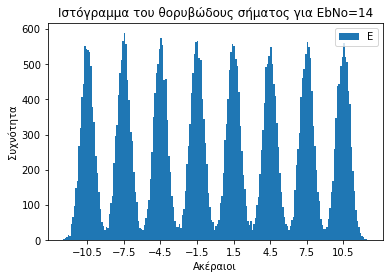

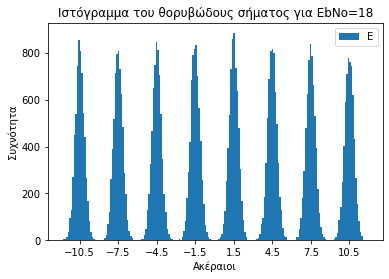

In [6]:
#Φτιαχνουμε τη συνάρτηση plot_histograms, η οποία βασιζόμενη στον κώδικα
#της ask_errors σχηματίζει το σήμα θορ΄ύβου με βάση τον σηματοθορυβικός λόγος SNR
#και εμφανίζει το ιστόγραμμα του θορυβώδους σήματος

def plot_histograms(EbN0_db):
    # σταθερές παράμετροι
    k = 3
    Nsymb = 50000 
    nsamp = 16
    L = 2**k
    d = 3
    
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)  #σηματοθορυβικός λόγος SNR σε db
    SNR = 10 ** (SNR_db * 0.1)                 #μετασχηματισμός db σε πραγματικό αριθμό
    
    #από το ερώτημα α) 
    # Διάνυσμα τυχαίων ακεραίων - διαφορετικών συμβόλων {±d/2, ±3d/2, ±5d/2... }
    x = d*np.floor(L*np.random.rand(Nsymb)) - L*d/2 + d/2
    
    P_x = (L*L-1) / 3
    Measured_x = np.sum(x*x)/len(x)

    y = []
    for i in range(len(x)):
        for j in range(nsamp):
            y.append(x[i])
    y = np.array(y)

    #σχηματισμός σήματος θορύβου
    noise = np.random.normal(0, np.sqrt(Measured_x/SNR),len(y))
    y_noisy = y + noise

    
    #εντολές σχετικές με το reshape - ερώτημα γ)
    # y: δισδιάστατος πίνακας με Μ γραμμές (αριθμός συμβόλων) και 
    # nsamp στήλες (αριθμός πραγμάτωσης του εκάστοτε συμβόλου)
    y = np.reshape(y_noisy, (Nsymb, nsamp))
    matched = np.ones((nsamp,1))
    z = np.matmul(y, matched)
    z = z / nsamp
    # παίρνουμε το μέσο όρο των δειγμάτων (αναφέρονται στο ίδιο σύμβολο)
        
    fig, ax = plt.subplots(1,1)
    plt.hist(z,200)
    A = np.unique(x) 
    ax.set_xticks(A)
    plt.xlabel("Ακέραιοι")
    plt.ylabel("Συχνότητα")
    plt.legend("Eb/N0 = 10")
    plt.title(f'Ιστόγραμμα του θορυβώδους σήματος για EbNo={EbN0_db}')
    plt.show()


#Με βάση το ερώτημα β) 
plot_histograms(12)
plot_histograms(14)
plot_histograms(18)


Παραπάνω παρατηρούμε ότι όσο αυξάνουμε το SNR τόσο πιο κοντά στο μέσο βρίσκονται τα δείγματα, αφού μειώνεται η διασπορά τους. Αυτό έχει ως αποτέλεσμα τα διαφορετικά σύμβολα να είναι πιο εύκολα διαχωρίσιμα μεταξύ τους μιας και όπως γνωρίζουμε από τη θεωρία μειώνεται η πιθανότητα σφάλματος.

### Μέρος 1
#### Τελική μορφή της ask_errors και απάντηση στο ερώτημα δ)

In [7]:
#Τελικά η ask_errors 
#με όσες από τις παραπάνω αλλαγές μπορούν να πραγματοποιηθούν συγχρόνως
#είναι :

def ask_errors(k,M,nsamp,EbN0_db, d=3):
    L = 2**k
    
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)    # SNR ανά δείγμα σήματος σε db
    SNR = 10 ** (SNR_db * 0.1)                   # το SNR σε αριθμό 
    
    x = d*np.floor(L*np.random.rand(M)) - L*d/2 + d/2  
    l = np.unique(x)                             
    #το l έχει τις αρχικές τιμές των συμβόλων, δηλαδή {±d/2, ±3d/2, ±5d/2... }
    
    Measured_x = np.sum(x*x)/len(x)

    y = []
    for i in range(len(x)):
        for j in range(nsamp):
            y.append(x[i])
    y = np.array(y)                              # μετατροπή της λίστας σε πίνακα numpy

    noise = np.random.normal(0, np.sqrt(Measured_x/SNR),len(y))
    y_noisy = y + noise

    y = np.reshape(y_noisy, (M, nsamp))          # δισδιάστατος πίνακας με Μ γραμμές (αριθμός συμβόλων) και 
                                                 # nsamp στήλες (αριθμός πραγμάτωσης του εκάστοτε συμβόλου)
    matched = np.ones((nsamp,1))                 
    z = np.matmul(y, matched)
    z = z / nsamp                                # παίρνουμε το μέσο όρο των δειγμάτων (αναφέρονται στο ίδιο σύμβολο)

    z = z[:,0]
    for i in range(len(z)):
        differences = np.abs(l-z[i]) 
        #differences: Πίνακας με τις διαφορές του σήματος από τα επίπεδα
        m = min(differences)         
        # ταξινομούμε το εκάστοτε σύμβολο στη στάθμη που απέχει λιγότερο (maximum likelihood)
        [index], = np.where(differences == m)
        z[i] = l[index]
    
    # Υπολογισμός Αριθμού Σφαλμάτων
    errors = 0
    for i in range(len(z)):
        if x[i] != z[i]:
            errors += 1
    
    return errors

In [8]:
#Παράδειγμα ευρεσης σφαλμάτων για διαφορετικές τιμές EbN0_db
#Tα αποτελέσματα αυτά θα χρησιμοποιηθούν στο μέρος 3
errors = ask_errors(4,50000,16,12)
print(errors)

errors = ask_errors(4,50000,16,14)
print(errors)

errors = ask_errors(4,50000,16,18)
print(errors)

10508
5842
703


#### Σημείωση:
Ακολουθεί τροποποιημένος κώδικας της ask_errors, ο οποίος εμφανίζει το Ιστόγραμμα του θορυβώδους σήματος.
Δεν φαίνεται να ζητήται σε κάποιο ερώτημα της εργαστηριακής άσκησης, ωστόσο υπήρχε ήδη στο Jupyter Notebook που μας
δόθηκε, οπότε αντί να το διαγράψουμε, διορθώσαμε κάποια λάθη και το αφήσαμε ως επιπλέον πληροφορία.

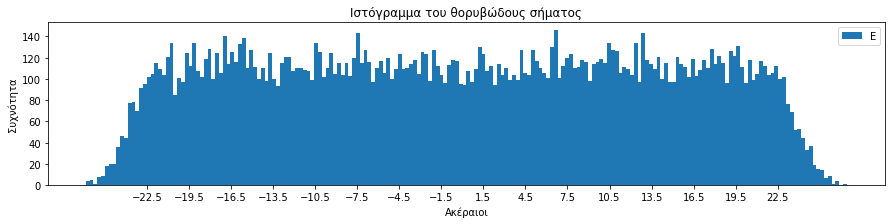

In [29]:
k = 4
M = 20000
nsamp = 16
EbN0_db = 10
d=3

L = 2**k

SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)
SNR = 10 ** (SNR_db * 0.1)


x = d*np.floor(L*np.random.rand(M)) - L*d/2 + d/2  
A = np.unique(x)  

Measured_x = np.sum(x*x)/len(x)

y = []
for i in range(len(x)):
    for j in range(nsamp):
        y.append(x[i])
y = np.array(y)

noise = np.random.normal(0, np.sqrt(Measured_x/SNR),len(y))
y_noisy = y + noise


y = np.reshape(y_noisy, (M, nsamp))
matched = np.ones((nsamp,1))
z = np.matmul(y, matched)
z = z / nsamp                    

fig, ax = plt.subplots(1,1, figsize=(15, 3))
plt.hist(z,200)
ax.set_xticks(A)
plt.xlabel("Ακέραιοι")
plt.ylabel("Συχνότητα")
plt.legend("Eb/N0 = 10")
plt.title('Ιστόγραμμα του θορυβώδους σήματος')

plt.show()

### Μέρος 2
#### Ερώτημα α)

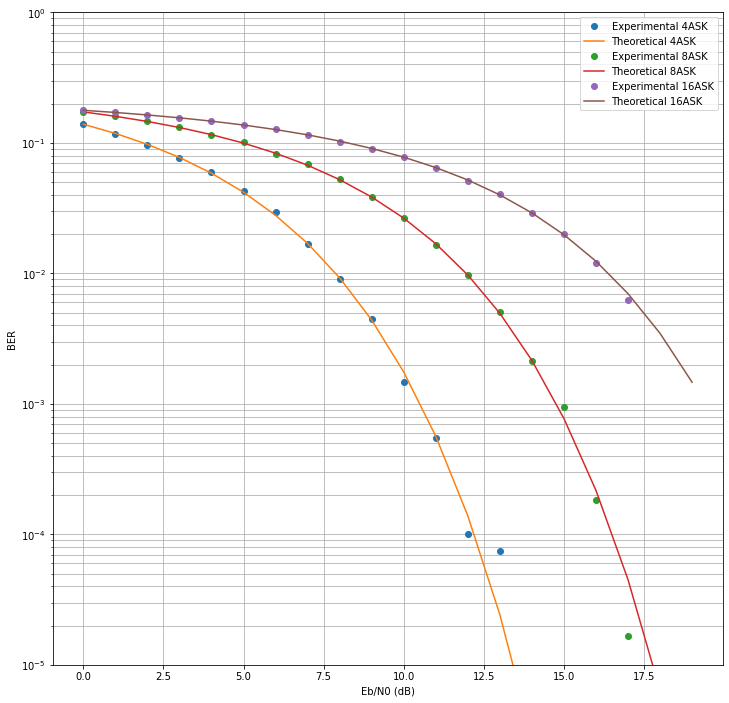

In [15]:
from scipy.special import erfc


def symbol_error(Nsymb, nsamp):
    
    Lamdas=[4,8,16]   # αριθμός διαφορετικών σταθμών (διαμόρφωση 4ASK, 8ASK, 16ASK)
    plt.figure(figsize=(12, 12))
    for L in Lamdas:
        k = np.log2(L)

        ber = np.zeros(18)
        for index in range (0,18):
            ber[index] = ask_errors(k,M,nsamp,index)/M/np.log2(L)
        
        plt.semilogy(ber,'o')
        plt.grid(True,which='both')
        plt.xlabel("Eb/N0 (dB)")
        plt.ylabel("BER")

        EbN0_db = np.arange(0,20,1)
        EbN0 = 10**(EbN0_db/10)
        ber_theoretical = (((L-1)/L)*erfc(np.sqrt(EbN0*(3*np.log2(L))/(L**2-1))))/k
        plt.semilogy(ber_theoretical)

        plt.legend(['Experimental' + str(L) + 'ASK','Theoretical' + str(L) + 'ASK'])
    
    plt.ylim(10**(-5), 1)
    plt.legend(['Experimental 4ASK', 'Theoretical 4ASK', 'Experimental 8ASK', 'Theoretical 8ASK', 'Experimental 16ASK'
               , 'Theoretical 16ASK'])
    plt.show()



M = 20000
k = 4
L = 2**k
nsamp = 16

symbol_error(Nsymb=20000, nsamp=nsamp)

#Eb/No={9,11,13,15}db

#### Σημείωση:
Το εργαλείο BERTOOL του MATLAB δεν υπάρχει στην Python, οπότε δεν βρήκαμε τρόπο να υλοποιήσουμε το δεύτερο 
ερώτημα του Μέρους 2.

### Μέρος 3

In [41]:
def ask_errors2(k,M,nsamp,EbN0_db):
    d=3
    L = 2**k
    
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)
    SNR = 10 ** (SNR_db * 0.1)
    
    #x = 2*np.floor(L*np.random.rand(M)) - L + 1
    x = d*np.floor(L*np.random.rand(M)) - L*d/2 + d/2  
    
    Measured_x = np.sum(x*x)/len(x)

    h = np.ones(nsamp)
    h = h/np.sqrt(h @ h)

    #H εντολή Ματλαμπ: y=upsample(x,nsamp);
    #δεν υπάρχει στην Python, οπότε την αναπαράγουμε ως:
    y = np.expand_dims(x, axis=1)   
    # το μετατρέπουμε σε διάνυσμα στήλη και βάζοημε nsamp μηδενικά. Στη συνέχεια κάνουμε flatten τον πίνακα που προκύπτει από τη συνένωση
    zeros = np.zeros((M, nsamp-1))
    y = np.hstack((y, zeros)).flatten()
    
    y = np.convolve(y, h)  
    y = y[0:M*nsamp+1]

    noise = np.random.normal(0, np.sqrt(Measured_x/SNR), len(y))
    y_noisy = y + noise

    matched = np.flip(h)
    
    yrx = np.convolve(y_noisy, matched)
    z = yrx[np.arange(nsamp, nsamp*(M)+1, nsamp)]


    #l = np.arange(-L+1,L,2)
    l = np.unique(x) 

    #z = z[:,0]
    for i in range(len(z)):
        differences = np.abs(l-z[i]) # Πίνακας με τις διαφορές του σήματος από τα επίπεδα
        m = min(differences)
        [index], = np.where(differences == m)
        z[i] = l[index]
    
    errors = 0
    for i in range(len(z)):
        if x[i] != z[i]:
            errors += 1
    
    return errors

In [43]:
errors = ask_errors2(4,50000,16,12)
print(errors)

errors = ask_errors2(4,50000,16,14)
print(errors)

errors = ask_errors2(4,50000,16,18)
print(errors)

36477
34405
28696
